In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import random 
%matplotlib inline 
import copy

In [2]:
def DFS_iterative(G,v):
    S = []
    visited = []
    S.append(v)
    while S:
        v = S.pop()
        if v not in visited:
            visited.append(v)
            for option in selectable_nodes(v):
                S.append(option)
                
# Hij moet ergens nog checken of twee nodes die connected zijn met elkaar niet dezelfde kleur hebben.

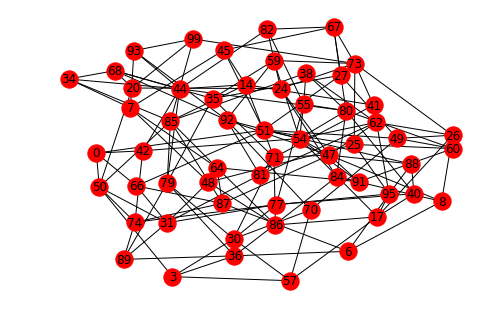

In [15]:
name = "/Users/melanie/Documents/Thesis/Programming/4K_graphs/5.137931034482759_D_58_N3_P"
G=nx.read_edgelist(name)
# colormap = nx.greedy_color(G, strategy='saturation_largest_first')
# print(colormap)
# theorder = sorted(colormap)

# for node in colormap:
#     for adjacent_node in G[node]:
#         if colormap[node] == colormap[adjacent_node]:
#             print("no good")
    
# col = []
# for i in theorder:
#     if colormap[i] == 0:
#         col.append('c')
#     elif colormap[i] == 1:
#         col.append('m')
#     elif colormap[i] == 2:
#         col.append('b')
#     else:
#         col.append('w')

nx.draw(G, with_labels = True)
plt.show()

In [ ]:
def selectable_nodes(G):
    options = []
    for node in G:
        if len(G[node]) == len(G[max(G, key=G.degree)]):
            options.append(node)
        return options

In [ ]:
def strategy_saturation_largest_first(G, colors):
    ''' Dit is alleen de volgorde van kleuren. Klopt zoals hij er nu in staat.
        Waar op gelet moet worden is colors. Deze mag slechts K lang zijn.
        Hier word voor gezorgd in de brelaz functie.'''

    distinct_colors = {v: set() for v in G}
    for i in range(len(G)):
        # On the first time through, simply choose the node of highest degree.
        if i == 0:
            nodes = selectable_nodes(G)
            # Add the color 0 to the distinct colors set for each
            # neighbors of that node.
            for v in G[node]:
                distinct_colors[v].add(0)
            return nodes
        else:
            # Compute the maximum saturation and the set of nodes that
            # achieve that saturation.
            saturation = {v: len(c) for v, c in distinct_colors.items()
                          if v not in colors}
            # Yield the node with the highest saturation, and break ties by
            # degree.
            node = max(saturation, key=lambda v: (saturation[v], G.degree(v)))
            yield node
            # Update the distinct color sets for the neighbors.
            color = colors[node] 
            for v in G[node]:
                distinct_colors[v].add(color)

def brelaz(G, K):
    
    colors = {}
    
    distinct_colors = {v: set() for v in G}
    for i in range(len(G)):
        # On the first time through, simply choose the node of highest degree.
        if i == 0:
            nodes = selectable_nodes(G)
            # Add the color 0 to the distinct colors set for each
            # neighbors of that node.
            for v in G[node]:
                distinct_colors[v].add(0)
            return nodes
        else:
            # Compute the maximum saturation and the set of nodes that
            # achieve that saturation.
            saturation = {v: len(c) for v, c in distinct_colors.items()
                          if v not in colors}
            # Yield the node with the highest saturation, and break ties by
            # degree.
            node = max(saturation, key=lambda v: (saturation[v], G.degree(v)))
            return node
            # Update the distinct color sets for the neighbors.
            color = colors[node] 
            for v in G[node]:
                distinct_colors[v].add(color)

    for u in nodes:
        # Set to keep track of colors of neighbours
        neighbour_colors = {colors[v] for v in G[u] if v in colors}
        # Find the first unused color.
        for color in range(K):
            if color not in neighbour_colors:
                colors[u] = color
        # Assign the new color to the current node.
#         colors[u] = color
    return colors
    
    
mycolors = brelaz(G, 4)
print(mycolors)

max_col = 0
for node in mycolors:
    if mycolors[node] > max_col:
        max_col = mycolors[node]
print(max_col)

for node in mycolors:
    for adjacent_node in G[node]:
        if mycolors[node] == mycolors[adjacent_node]:
            print("no good")

In [ ]:
colormap = nx.greedy_color(F, strategy='saturation_largest_first')
theorder = sorted(colormap)
print(colormap)

In [ ]:
col = []
for i in theorder:
    if colormap[i] == 0:
        col.append('c')
    elif colormap[i] == 1:
        col.append('m')
    elif colormap[i] == 2:
        col.append('b')
    else:
        col.append('w')
        
nx.draw(F,node_color = col,with_labels = True)
plt.show()

In [16]:
F = nx.Graph()
F.add_edge(0,2)
F.add_edge(0,1)
F.add_edge(0,3)
F.add_edge(0,4)
F.add_edge(1,2)
F.add_edge(1,3)


# nx.draw(F,with_labels = True)
# plt.show()


def options(F, distinct_colors, colors):

    for i in range(len(F)):
        # Compute the maximum saturation and the set of nodes that
        # achieve that saturation.
        saturation = {v: len(c) for v, c in distinct_colors.items() # om te kijken hoe hoog de saturation is
                       if v not in colors} # want als hij in colors zit is die ingekleurd
        # Yield the node with the highest saturation, and break ties by
        # degree.
        
        # Dit deel stelt vast welke nodes de hoogste saturation hebben en stopt ze in een lijst
        max_sat = 0
        for key in saturation:
            if saturation[key] > max_sat:
                max_sat = saturation[key]
        max_sat_items = []
        for key in saturation:
            if saturation[key] == max_sat:
                max_sat_items.append(key)
        max_deg = 0

        # Dit deel stelt vast welke nodes van de hoogste saturation de meeste connecties hebben en stopt
        # deze dan ook weer in een lijst
        if len(max_sat_items) > 1:
            max_sat_max_deg = []
            for item in max_sat_items:
                if max_deg < len(F[item]):
                    max_deg = len(F[item])

            for item in max_sat_items:
                if len(F[item]) == max_deg:
                    max_sat_max_deg.append(item)
            return max_sat_max_deg
        
        return max_sat_items

# for i in range(len(F)):
#     colors = {}
#     stack = []
#     distinct_colors = {v: set() for v in F}
#     if i == 0:
#         colors[0] = 0
#         for v in F[0]:
#             distinct_colors[v].add(0)
#     while len(colors) != len(F):
#         o = options(F, distinct_colors, colors)
#         for item in o:
#             stack.append(item)
#         v = stack.pop()
#         for color in range(4):
#             if color not in distinct_colors[v]:
#                 colors[v] = color
#                 for neighbour in F[v]:
#                     distinct_colors[neighbour].add(color)
#                 break
                

            
# print(colors)


# col = ['c', 'm', 'b', 'm', 'b'] 
# # hij kleurt in een hele gekke volgorde in: eerst 0 -> 2 -> 1 -> 3 -> 4. ?????

# nx.draw(F,node_color = col, with_labels = True)
# plt.show()


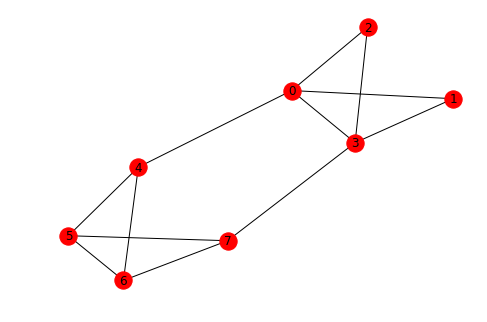

In [17]:
G = nx.Graph()
G.add_edge(0,1)
G.add_edge(0,2)
G.add_edge(0,3)
G.add_edge(0,4)
G.add_edge(1,3)
G.add_edge(2,3)
G.add_edge(3,7)
G.add_edge(4,5)
G.add_edge(4,6)
G.add_edge(5,6)
G.add_edge(5,7)
G.add_edge(6,7)

nx.draw(G,with_labels = True)
plt.show()


In [ ]:
for i in range(len(G)):
    colors = {}
    stack = []
    distinct_colors = {v: set() for v in G}
    if i == 0:
        colors[0] = 0
        for v in G[0]:
            distinct_colors[v].add(0)
    choices = []
    while len(colors) != len(G):
        o = options(G, distinct_colors, colors)
        if len(o) > 1:
            choices.append(o)
        for item in o:
            stack.append(item)
        v = stack.pop()
        for color in range(3):
            if len(distinct_colors[v]) == 3:
                last_choice = choices.pop()
                for c_nodes in last_choice:
                    if c_nodes in colors:
                        # POP ALLE KEYS DIE TOEGEVOEGD ZIJN NA DEZE NODE. 
            elif color not in distinct_colors[v]:
                colors[v] = color
                for neighbour in G[v]:
                    distinct_colors[neighbour].add(color)
                break



In [8]:
name = "/Users/melanie/Documents/Thesis/Programming/4K_graphs/9.24_D_100_N5_P"
G=nx.read_edgelist(name)

In [ ]:
def DFS_order_Brelaz(G, k):
    colors = {}

    distinct_colors = {v: set() for v in G}

    stack = []
    d_stack = []
    
    nodes = options(G, distinct_colors, colors)
    for node in nodes:
        colors_2 = copy.deepcopy(colors)
        distinct_colors_2 = copy.deepcopy(distinct_colors)
        for color in range(k):  
            if color not in distinct_colors_2[node]:
                colors_2[node] = color
                for neighbour in G[node]:
                    distinct_colors_2[neighbour].add(color)
                stack.append(colors_2)
                d_stack.append(distinct_colors_2)
                break
                    
    while stack:
        print(stack)
        colors_1 = stack.pop()
        distinct_colors = d_stack.pop()
        nodes = options(G, distinct_colors, colors_1)
        for node in nodes:
            colors_2 = copy.deepcopy(colors_1)
            distinct_colors_2 = copy.deepcopy(distinct_colors)
            for color in range(k):  
                if color not in distinct_colors_2[node]:
                    colors_2[node] = color
                    for neighbour in G[node]:
                        distinct_colors_2[neighbour].add(color)
                    stack.append(colors_2)
                    d_stack.append(distinct_colors_2)
                    break
    
    if len(colors_1) == len(G):
        return colors_1
    
    print(colors_1)
    if stack == [] and len(colors_1) != len(G):
        return "No solution"
    
    
DFS_order_Brelaz(G, 4)

In [19]:
name = "/Users/melanie/Documents/Thesis/Programming/4K_graphs/9.24_D_100_N5_P"
G=nx.read_edgelist(name)

In [43]:
import time
def DFS_color_Brelaz(G, k):
    start = time.time()
    colors = {}

    distinct_colors = {v: set() for v in G}

    stack = []
    d_stack = []
    visited = []
    steps = 0
    brelaz_steps = 0
    
    nodes = options(G, distinct_colors, colors)
    for node in nodes:
        brelaz_steps += 1
        for color in range(k):
            colors_2 = copy.deepcopy(colors)
            if color not in distinct_colors[node]:
                distinct_colors_2 = copy.deepcopy(distinct_colors)
                colors_2[node] = color
                for neighbour in G[node]:
                    distinct_colors_2[neighbour].add(color)
                stack.append(colors_2)
                d_stack.append(distinct_colors_2)
                    
    while stack:
        colors_1 = stack.pop()
        steps += 1

        if colors_1 in visited:
            continue
        if steps > 150000 and len(colors_1) != len(G):
            end = time.time()
            runtime = (end - start)
            return {}, steps, runtime 
        visited.append(colors_1)
        if len(colors_1) == len(G):
            end = time.time()
            runtime = (end - start)
            return colors_1, steps, runtime
        distinct_colors = d_stack.pop()
        nodes = options(G, distinct_colors, colors_1)
        for node in nodes:
            brelaz_steps += 1
            for color in range(k): 
                colors_2 = copy.deepcopy(colors_1)
                if color not in distinct_colors[node]:
                    distinct_colors_2 = copy.deepcopy(distinct_colors)
                    colors_2[node] = color
                    for neighbour in G[node]:
                        distinct_colors_2[neighbour].add(color)
                    if colors_2 not in visited:
                        stack.append(colors_2)
                        d_stack.append(distinct_colors_2)
    
    
    if len(colors_1) == len(G):
        end = time.time()
        runtime = (end - start)
        return colors_1, steps, runtime
    
    if stack == [] and len(colors_1) != len(G):
        end = time.time()
        runtime = (end - start)
        return {}, steps, runtime

In [ ]:
import os
import json
def split_filename(filename):
    parts = filename.split('_')
    degree = parts[0]
    nodes = parts[2] 
    p = parts[3][1]
    
    return degree, nodes, p

for filename in os.listdir("4K_graphs"):
    degree, nodes, p = split_filename(filename)
    name = "/Users/melanie/Documents/Thesis/Programming/4K_graphs/" + str(filename)
    G=nx.read_edgelist(name)
    colorlist, steps, runtime = DFS_color_Brelaz(G, 4)
    
    data = {
        "degree": degree,
        "nodes": nodes,
        "p": p,
        "colorlist": colorlist,
        "steps": steps,
        "runtime":runtime
    }
    
    with open('coloured_4K_graphs.json', 'a') as outfile:
        json.dump(data, outfile, indent=2)

In [ ]:
DFS_order_Brelaz(G, 4)

{'87': 3, '65': 2, '76': 1, '84': 0, '59': 3, '16': 1, '12': 3, '24': 3, '23': 2, '18': 1, '72': 1, '4': 0, '25': 2, '0': 2, '99': 2, '49': 3, '15': 0, '85': 3, '61': 1, '26': 0, '97': 2, '63': 2, '43': 0, '39': 2, '89': 0, '42': 1, '38': 1, '47': 3, '48': 0, '17': 1, '1': 2, '81': 1, '93': 3, '19': 0, '77': 3, '13': 0, '34': 1, '68': 1}
{'87': 3, '65': 2, '76': 1, '84': 0, '59': 3, '16': 1, '12': 3, '24': 3, '23': 2, '18': 1, '72': 1, '4': 0, '25': 2, '0': 2, '99': 2, '49': 3, '15': 0, '85': 3, '61': 1, '26': 0, '97': 2, '63': 2, '43': 0, '39': 2, '89': 0, '42': 1, '38': 1, '47': 3, '48': 0, '17': 1, '1': 2, '81': 1, '93': 3, '19': 0, '77': 3, '13': 0, '68': 1, '34': 1}
